Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [ ]:
#!pip install -U scikit-learn
#!pip install -U imbalanced-learn
!pip install catboost xgboost lightgbm

In [80]:
import pandas as pd
import numpy as np
import warnings
import sys
sys.path.append('../')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns



from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [48]:
from Prueba_Tecnica_Nivel.funciones import data_report


In [49]:
df = pd.read_csv('data/train.csv')

In [50]:
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [51]:
df['target'].value_counts()

target
0    4957
1     640
Name: count, dtype: int64

observamos una target con datos de tipo binario muy desbalanceada

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [53]:
df.duplicated().sum()

0

Observamos que todas las variables son de tipo numerico, no contiene nulos y tampoco hay duplicados.

In [63]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,0.329693,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,0.377353,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,0.008000,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,0.700000,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


Haremos una primera observacion grafica de las variables.

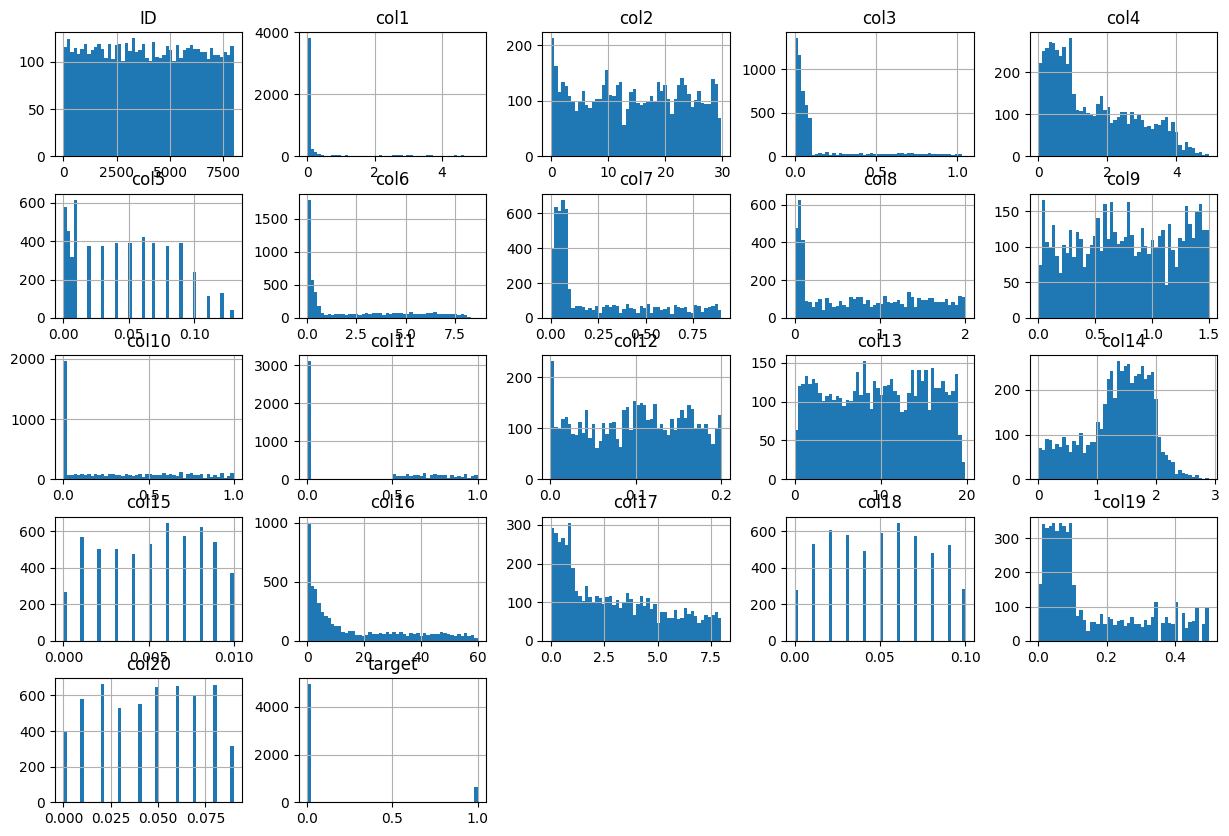

In [54]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [55]:
data_report(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
ID,int64,0.0,5597,100.0
col1,float64,0.0,479,8.56
col2,float64,0.0,2320,41.45
col3,float64,0.0,107,1.91
col4,float64,0.0,470,8.4
col5,float64,0.0,23,0.41
col6,float64,0.0,784,14.01
col7,float64,0.0,91,1.63
col8,float64,0.0,201,3.59


Eliminamos la variable ID, pues tiene un 100% de cardinalidad

In [56]:
df = df.drop('ID', axis=1)

Analizamos la correlacion entre las variables

In [30]:
# Borra las columnas con una correlacion menor a 0.2
corr = np.abs(df.corr()['target']).sort_values(ascending=True)
print(corr)

bad_corr_feat = corr[corr <0.2].index.values
print(bad_corr_feat)



col12     0.001483
col9      0.003556
col10     0.014044
col2      0.017318
col18     0.021912
col8      0.031497
col15     0.046551
col14     0.054494
col13     0.062230
col16     0.067342
col20     0.068796
col17     0.069023
col11     0.086419
col4      0.104875
col19     0.105710
col3      0.132675
col7      0.174420
col6      0.198555
col5      0.271454
col1      0.358168
target    1.000000
Name: target, dtype: float64
['col12' 'col9' 'col10' 'col2' 'col18' 'col8' 'col15' 'col14' 'col13'
 'col16' 'col20' 'col17' 'col11' 'col4' 'col19' 'col3' 'col7' 'col6']


In [31]:
#df.drop(columns = bad_corr_feat, inplace = True)

In [57]:
df_bl =df.copy()

HAcermos la division de datos en train y test para evaluar algunos modelos que nos permitan visualizar el peso de cada variable en la prediccion

In [59]:
X = df_bl.drop('target', axis=1)
y = df_bl['target']

In [60]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)


In [65]:
#Escalamos las variables del dataset
sca = MinMaxScaler()
sca.fit(X_train) #Solo aplicamos .fit a las variables de Train
X_train_sca = sca.transform(X_train)
X_test_sca = sca.transform(X_test) #A las variables de Test solo se les aplica el .transform

In [66]:
y_train.value_counts()

target
0    3965
1     512
Name: count, dtype: int64

In [67]:
sampling_strategy = {0:3965, 1: 3965}

In [72]:
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=3)
X_train_sca_smote, y_train_smote = smote.fit_resample(X_train_sca, y_train)

In [73]:
y_train_smote.value_counts()

target
0    3965
1    3965
Name: count, dtype: int64

Definimos y aplicamos modelos y metricas para la clasificacion

In [78]:
#Definimos los modelos a usar para la clasificacion

modelos = {'Bosque Aleatorio' : RandomForestClassifier(),
        'LGBMClassifier' : LGBMClassifier(),
        'CatBoostClassifier' : CatBoostClassifier(verbose=False)}

#Definimos las metricas 
metricas = ['accuracy', 'recall_macro', 'balanced_accuracy']

#Cross Validation
resultados = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train_sca_smote, y_train_smote, cv=5, scoring=metricas)
    resultados_metricas = {metrica : cv_resultados[f'test_{metrica}'].mean() for metrica in metricas}

    resultados[nombre_modelo] = resultados_metricas

#Convertir el diccionario en DataFrame
resultados_df = pd.DataFrame(resultados).T

[LightGBM] [Info] Number of positive: 3172, number of negative: 3172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5089
[LightGBM] [Info] Number of data points in the train set: 6344, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3172, number of negative: 3172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5081
[LightGBM] [Info] Number of data points in the train set: 6344, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3172, number of negative: 

In [79]:
resultados_df

,accuracy,recall_macro,balanced_accuracy
Bosque Aleatorio,0.975410,0.975410,0.975410
LGBMClassifier,0.978562,0.978562,0.978562
CatBoostClassifier,0.976671,0.976671,0.976671


Evaluamos con el Test

In [81]:
# Evaluar cada modelo en el conjunto de prueba
resultados_prueba = {}

for nombre_modelo, modelo in modelos.items():
    # Entrenar el modelo en el conjunto de entrenamiento
    modelo.fit(X_train_sca_smote, y_train_smote)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred_prueba = modelo.predict(X_test_sca)
    
    # Calcular métricas en el conjunto de prueba
    accuracy_prueba = accuracy_score(y_test, y_pred_prueba)
    recall_macro_prueba = recall_score(y_test, y_pred_prueba, average='macro')
    balanced_accuracy_prueba = balanced_accuracy_score(y_test, y_pred_prueba)
    
    # Guardar las métricas en el diccionario de resultados_prueba
    resultados_prueba[nombre_modelo] = {'accuracy': accuracy_prueba,
                                         'recall_macro': recall_macro_prueba,
                                         'balanced_accuracy': balanced_accuracy_prueba}

# Convertir el diccionario de resultados_prueba en DataFrame
resultados_prueba_df = pd.DataFrame(resultados_prueba).T

[LightGBM] [Info] Number of positive: 3965, number of negative: 3965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5088
[LightGBM] [Info] Number of data points in the train set: 7930, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [82]:
resultados_prueba_df

,accuracy,recall_macro,balanced_accuracy
Bosque Aleatorio,0.964286,0.908392,0.908392
LGBMClassifier,0.971429,0.932838,0.932838
CatBoostClassifier,0.969643,0.935232,0.935232
